<a href="https://colab.research.google.com/github/u-masao/python_sound_programming/blob/main/notebooks/01_sound_data_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 音声データの処理手法

ESC-50 データセットを使い、音声データの処理方法を確認します。


In [14]:
! git clone https://github.com/karolpiczak/ESC-50.git
! pip install japanize-matplotlib

fatal: destination path 'ESC-50' already exists and is not an empty directory.


# 音声データの構造
「振幅、サンプリングレート」について。

音声データは、等しい時間間隔で記録された一連の振幅情報で表されます。

サンプリングレートは、一秒間に何回記録されたかを示し、単位は[Hz]を使います。



# 読み込み
　データ、サンプリングレート、長さ


In [15]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import japanize_matplotlib
import numpy as np
import IPython.display

In [16]:
!ls ESC-50/audio | head

1-100032-A-0.wav
1-100038-A-14.wav
1-100210-A-36.wav
1-100210-B-36.wav
1-101296-A-19.wav
1-101296-B-19.wav
1-101336-A-30.wav
1-101404-A-34.wav
1-103298-A-9.wav
1-103995-A-30.wav


In [17]:
waveform, sr = librosa.load("ESC-50/audio/1-100032-A-0.wav", sr=None)

In [18]:
print("生波形データの形:", waveform.shape)
print(f"サンプリングレート: {sr} [Hz]")
print(f"サンプリング長: {len(waveform)/sr} [s]")

生波形データの形: (220500,)
サンプリングレート: 44100 [Hz]
サンプリング長: 5.0 [s]


In [19]:
print("生波形データ:", waveform[int(2.3*sr):][:20])

生波形データ: [-0.01815796  0.01953125  0.06140137  0.06787109  0.06213379  0.0831604
  0.11395264  0.12710571  0.10800171  0.07272339  0.0668335   0.07461548
  0.04333496 -0.01123047 -0.04928589 -0.07019043 -0.08892822 -0.11236572
 -0.12887573 -0.13357544]


# スピーカー出力

In [20]:
IPython.display.Audio(waveform, rate=sr)

# 特徴量作成

- 各種統計量
  - 平均、標準偏差、最大値、最小値、絶対値平均、Peak-to-peak、実効値、波高率




In [21]:
print("平均値:", waveform.mean())
print("標準偏差:", waveform.std())
print("最大値:", waveform.max())
print("最小値:", waveform.min())
print("絶対値平均:", np.abs(waveform).mean())
print("peak-to-peak:", waveform.max() - waveform.min())
print("実効値:", (waveform**2).mean()**0.5)
print("波高率:", waveform.max() /  (waveform**2).mean()**0.5)


平均値: -1.4933545e-07
標準偏差: 0.041524757
最大値: 0.99884033
最小値: -0.9683838
絶対値平均: 0.0057237213
peak-to-peak: 1.9672241
実効値: 0.0415247556265459
波高率: 24.054092961180785


# 時間領域の可視化

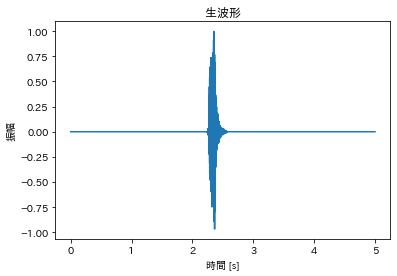

In [22]:
# 生波形表示
ts = np.linspace(0,len(waveform)/sr, len(waveform))
plt.plot(ts, waveform)
plt.xlabel("時間 [s]")
plt.ylabel("振幅")
plt.title("生波形")
# plt.xlim(2.2,2.6) # 行頭のコメントを消してみてください
plt.show()

# 離散フーリエ変換（FFT）
時間領域から周波数領域へ変換

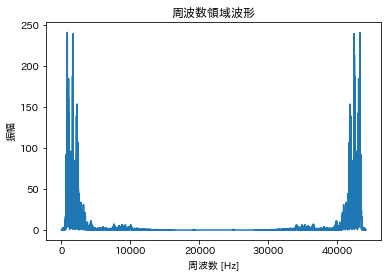

In [23]:
# 変換
spectorum = np.fft.fft(waveform)

# 可視化
ts = np.linspace(0,sr, len(spectorum))
plt.plot(ts, np.abs(spectorum))
plt.xlabel("周波数 [Hz]")
plt.ylabel("振幅")
plt.title("周波数領域波形")
# plt.xlim(0,2000) # 行頭のコメントを消してみてください
plt.show()

# 絶対値 離散フーリエ変換


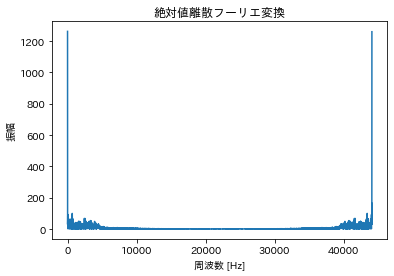

In [24]:
# 変換
spectorum_abs = np.fft.fft(np.abs(waveform))

# 可視化
ts = np.linspace(0,sr, len(spectorum_abs))
plt.plot(ts, np.abs(spectorum_abs))
plt.xlabel("周波数 [Hz]")
plt.ylabel("振幅")
plt.title("絶対値離散フーリエ変換")
# plt.xlim(0,200) # 行頭のコメントを消してみてください
plt.show()

# スペクトログラム

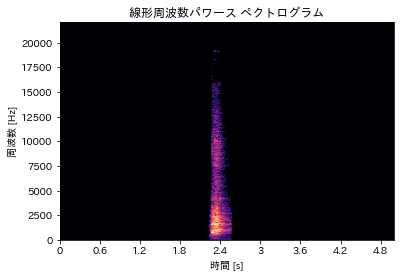

In [25]:
# データ生成
spec_db = librosa.amplitude_to_db(np.abs(librosa.stft(waveform)), ref=np.max)

# 可視化
fig, ax = plt.subplots(1,1)
img = librosa.display.specshow(spec_db, y_axis='linear', x_axis='time',
                               sr=sr, ax=ax)
ax.set(title='線形周波数パワース ペクトログラム')
ax.set_xlabel("時間 [s]")
ax.set_ylabel("周波数 [Hz]")
ax.label_outer()
plt.show()